## Time to get your hands dirty! The irreducible mass of black holes.
#### Tasks:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the distribution of $M_{\rm irr}$ using a KDE.

4. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

6. You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.


7. Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats
from scipy.integrate import quad
from tqdm import tqdm
from sklearn.mixture import GaussianMixture
from astropy.visualization.hist import hist as fancyhist
from sklearn.neighbors import KernelDensity

In [2]:
#Defining the variables, assuming a uniform distribution for the spin and a normal distribution for the mass
spin = np.random.uniform(0, 1, 10000)
mass = np.random.normal(1, 0.02, 10000)  #we use mu=1 and sigma=0.02
Mirr = mass * ((1 + (1-spin**2)**0.5)/2)**0.5

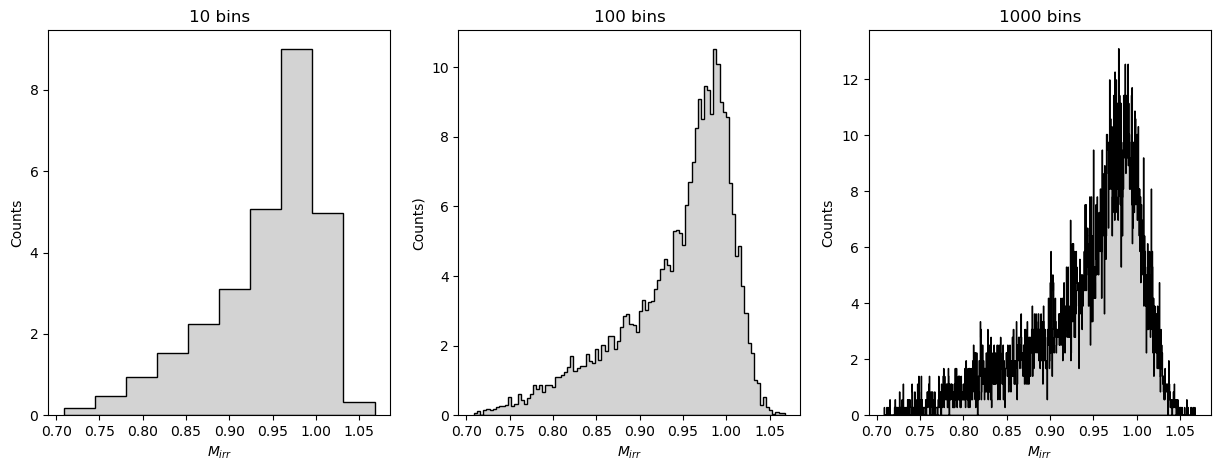

In [3]:
#Histograms of Mirr using different numbers of bins (N=10, N=100, N=1000)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(Mirr, bins = 10, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[0].set_xlabel(r'$M_{irr}$')
axs[0].set_ylabel('Counts')
axs[0].set_title('10 bins')

axs[1].hist(Mirr, bins = 100, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[1].set_xlabel(r'$M_{irr}$')
axs[1].set_ylabel('Counts)')
axs[1].set_title('100 bins')

axs[2].hist(Mirr, bins = 1000, density = True, ec='black', fc='lightgrey', histtype='stepfilled')
axs[2].set_xlabel(r'$M_{irr}$')
axs[2].set_ylabel('Counts')
axs[2].set_title('1000 bins')

plt.show()

## Scott & Freedman

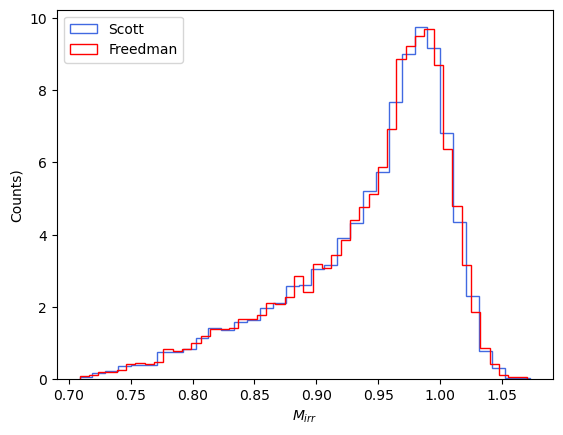

In [4]:
#Hisitogram of Mirr using the Scott's rule and the Freedman's rule
hist_scott = fancyhist(Mirr, bins="scott", histtype="step", density=True, ec = 'royalblue', label = 'Scott')
hist_freedman = fancyhist(Mirr, bins="freedman", histtype="step", density=True, ec = 'red', label = 'Freedman')
plt.xlabel(r'$M_{irr}$')
plt.ylabel('Counts)')
plt.legend(loc='upper left')
plt.show()

## KDE

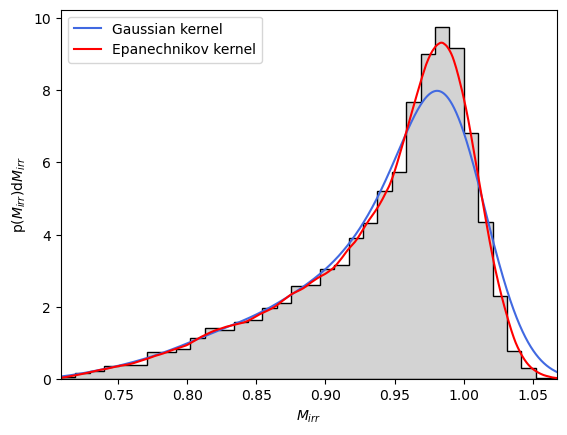

In [5]:
#Using KDE on Mirr
xgrid = np.linspace(Mirr.min(), Mirr.max(), 10000) 

def kde_sklearn(data, bandwidth = 1.0, kernel = "linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel = kernel)  #Definig the model
    kde_skl.fit(data[:, np.newaxis])  #Fitting the model to data
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis])  #Computing the log-likelihood of each sample
    return np.exp(log_pdf)
    
PDF_gaussian_Mirr = kde_sklearn(Mirr, bandwidth = 0.02, kernel="gaussian")  #Using KDE with a gaussian kernel and bandwidth of 0.02
plt.plot(xgrid, PDF_gaussian_Mirr, color = 'royalblue', label = 'Gaussian kernel') 

PDF_epanechnikov_Mirr = kde_sklearn(Mirr, bandwidth = 0.02, kernel="epanechnikov")  #Using KDE with a epanechnikov kernel and bandwidth of 0.02
plt.plot(xgrid, PDF_epanechnikov_Mirr, color = 'red', label = 'Epanechnikov kernel') 

hist_scott = fancyhist(Mirr, bins = "scott", density = True, ec='black', fc='lightgrey', histtype='stepfilled')

plt.xlim(Mirr.min(), Mirr.max())
plt.xlabel(r'$M_{irr}$')
plt.ylabel(r'p($M_{irr}$)d$M_{irr}$')
plt.legend(loc='upper left')
plt.show()

## Distribution of f

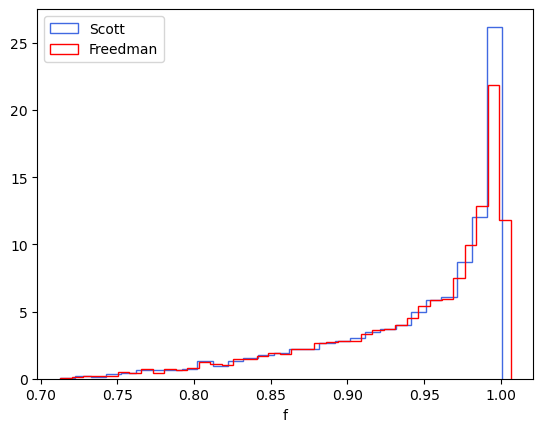

In [6]:
#Hisitogram of Mirr using the Scott's rule and the Freedman's rule
f = Mirr/mass
hist_scott = fancyhist(f, bins="scott", histtype="step", density=True, ec = 'royalblue', label = 'Scott')
hist_freedman = fancyhist(f, bins="freedman", histtype="step", density=True, ec = 'red', label = 'Freedman')
plt.xlabel('f')
plt.legend(loc='upper left')
plt.show()

## Comparison with the theoretical PDF

#### PDF of ${f}$
To compute the pdf of ${f}$ we use the trasformation of random variables. 
Thus, $$p(y) = \left|\frac{dx}{dy}\right| p(x).$$ 
In our case, $x$ is uniformly distibuted between 0 and 1, so $p(x)=1$.

With ${f} = y$ and $\chi = x$

\begin{gather*}
y=\sqrt{\frac{1+\sqrt{1-x^2}}{2}}\\
\sqrt{1-x^2}=2y^2-1\\
x=2y\sqrt{1-y^2}
\end{gather*}
The derivative is:
\begin{align*}
\frac{dy}{dx}=-\frac{1}{2}\frac{\sqrt{1-y^2}}{2y^2-1}
\end{align*}
Therefore:
\begin{align*}
p(f)=\lvert dy/dx \rvert^{-1}=2\frac{2f^2-1}{\sqrt{1-f^2}}
\end{align*}

100%|██████████| 10000/10000 [00:00<00:00, 740127.76it/s]


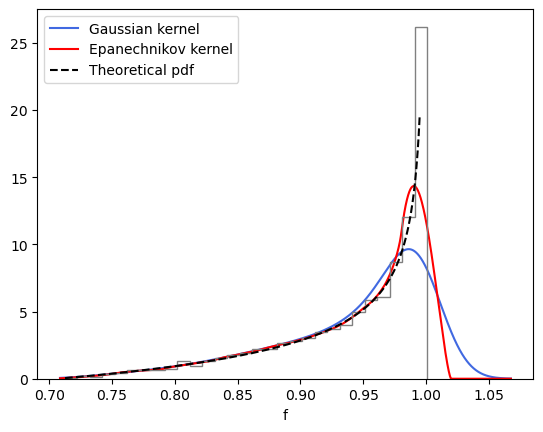

In [29]:
#Computing the pdf of f and confronting it with KDE done using a gaussian kernel and a epanechnikov kernel
def pdf_f(x):
    return 2*((2*x**2-1)/(1-x**2)**0.5)  

f_lin = np.linspace(min(f), 0.995, 10000)
p_f = [pdf_f(x) for x in tqdm(f_lin)] 

PDF_gaussian_f = kde_sklearn(f, bandwidth = 0.02, kernel="gaussian")
plt.plot(xgrid, PDF_gaussian_f, color = 'royalblue', label = 'Gaussian kernel') 

PDF_epanechnikov_f = kde_sklearn(f, bandwidth = 0.02, kernel="epanechnikov") 
plt.plot(xgrid, PDF_epanechnikov_f, color = 'red', label = 'Epanechnikov kernel') 

hist_scott = fancyhist(f, bins = "scott", density = True, ec='grey', histtype='step')
plt.plot(f_lin, p_f, color = 'black', label = 'Theoretical pdf', ls='--')
plt.xlabel('f')
plt.legend(loc='upper left')
plt.show()

#### PDF of $M_{irr}$
Since $M_{irr}=f(\chi)\times M$, we can use the following theoreme:

If $X$ and $Y$ are two independent, continuous random variables, described by probability density functions $f_X$ and $f_Y$ then the probability density function of $Z=XY$ is:
\begin{align*}
f_Z(z)=\int_{-\infty}^\infty f_X(x)f_Y(z/x)\frac{1}{\lvert x \rvert}dx
\end{align*}

We have already computed the PDF of $f$ and the PDF of $M$ is a gaussian, thus
\begin{align*}
p(M_{irr})=\int_{1/\sqrt{2}}^1p(f)\mathcal{N}(M_{irr}/f,\mu,\sigma)\frac{1}{f}df
\end{align*}.

100%|██████████| 10000/10000 [00:11<00:00, 902.25it/s]


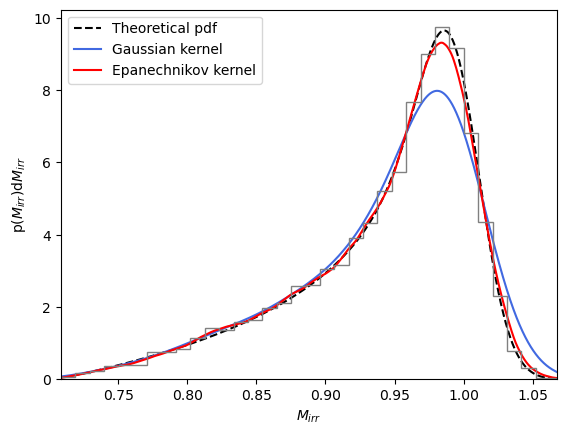

In [7]:
#Computing the pdf of Mirr and confronting it with KDE done using a gaussian kernel and a epanechnikov kernel
def pdf_Mirr(mirr, sigma, mean):
    integral = scipy.integrate.quad(lambda ef: np.exp(- (mirr/ef-mean)**2/(2*sigma**2))*(2*ef**2-1)/(ef*np.sqrt(1-ef**2)), 1/np.sqrt(2), 1)[0]
    return (np.sqrt(2/np.pi)/sigma)*integral

p_Mirr = [pdf_Mirr(xi, 0.02, 1) for xi in tqdm(xgrid)]

plt.plot(xgrid, p_Mirr, color = 'black', label = 'Theoretical pdf', ls = '--')
plt.plot(xgrid, PDF_gaussian_Mirr, color = 'royalblue', label = 'Gaussian kernel') 
plt.plot(xgrid, PDF_epanechnikov_Mirr, color = 'red', label = 'Epanechnikov kernel') 
fancyhist(Mirr, bins = "scott", density = True, ec='grey', histtype='step')
plt.xlim(Mirr.min(), Mirr.max())
plt.xlabel(r'$M_{irr}$')
plt.ylabel(r'p($M_{irr}$)d$M_{irr}$')
plt.legend(loc='upper left')
plt.show()

## KS test

In [15]:
#Computing the KS distance between Mirr and f and between Mirr and M for different values of sigma
sigma = np.logspace(-4, 4, 100)
ks_f = np.zeros(len(sigma))
ks_M = np.zeros(len(sigma))
for i in tqdm(range(len(sigma))):
    spin = np.random.uniform(0, 1, 10000)
    M = (np.random.normal(1, sigma[i], 10000))
    M_irr = (M * ((1 + (1-spin**2)**0.5)/2)**0.5)
    ff = M_irr/M
    ks_f[i] = scipy.stats.kstest(M_irr, ff).statistic  #Returns the KS distance between Mirr and f
    ks_M[i] = scipy.stats.kstest(M_irr, M).statistic  #Returns the KS distance between Mirr and M

100%|██████████| 100/100 [00:01<00:00, 83.42it/s]


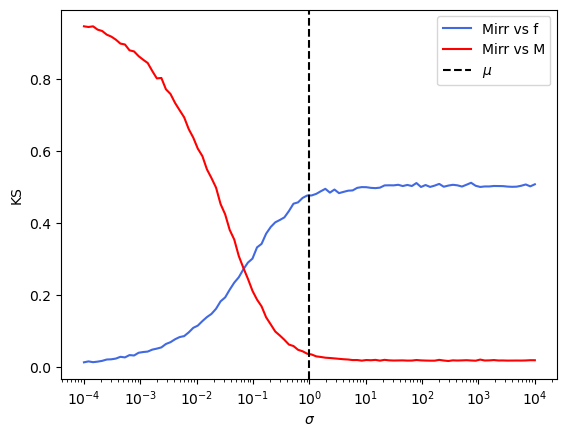

In [18]:
plt.plot(sigma, ks_f, color = 'royalblue', label = 'Mirr vs f')
plt.plot(sigma, ks_M, color = 'red', label = 'Mirr vs M')
plt.semilogx()
plt.axvline(1, color = 'black', ls = '--', label = r'$\mu$')
plt.xlabel('$\sigma$')
plt.ylabel('KS distance')
plt.legend()
plt.show()

- If $\sigma\ll\mu$, $M_{irr}$ is distributed as ${f}$ since the KS distance between them is small;
- If $\sigma\gg\mu$, $M_{irr}$ is distributed as ${M}$ since the KS distance between them is small.